## Task 1
Below, we are following 

In [194]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt

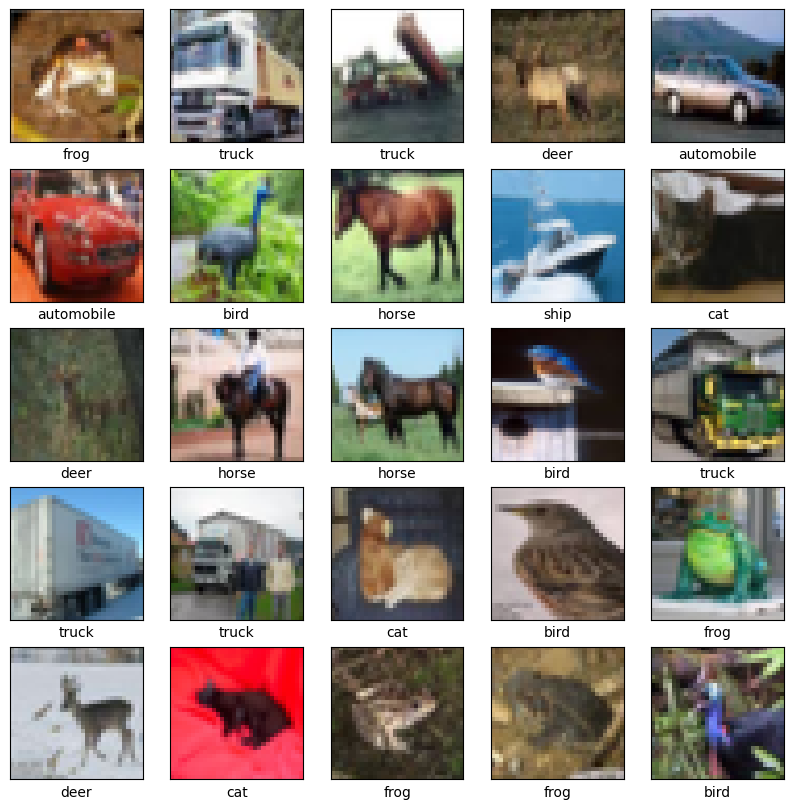

In [195]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3436 - loss: 1.7750 - val_accuracy: 0.5325 - val_loss: 1.2793
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5653 - loss: 1.2213 - val_accuracy: 0.6215 - val_loss: 1.0745
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6289 - loss: 1.0504 - val_accuracy: 0.6311 - val_loss: 1.0566
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6699 - loss: 0.9400 - val_accuracy: 0.6637 - val_loss: 0.9603
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6996 - loss: 0.8605 - val_accuracy: 0.6868 - val_loss: 0.9132
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7256 - loss: 0.7840 - val_accuracy: 0.6956 - val_loss: 0.8961
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7413 - loss: 0.7369 - val_accuracy: 0.6906 - val_loss: 0.9132
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7472 - loss: 0.7177 - 

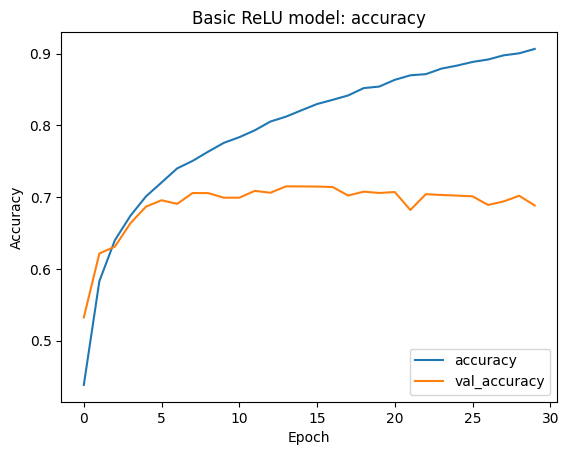

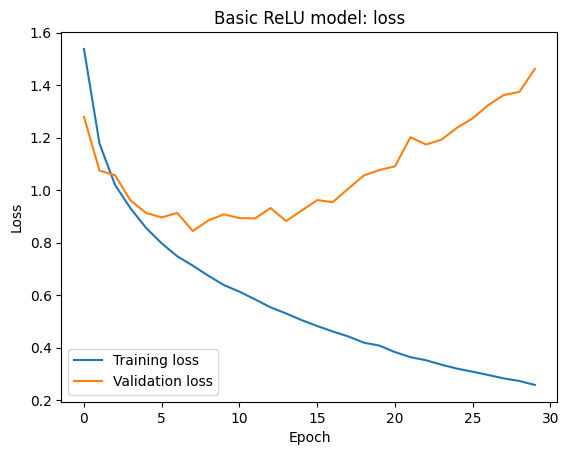

In [196]:
# basic ReLU model
model = models.Sequential(
    [
        keras.Input((32, 32, 3)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

# testing the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with basic ReLU model: ", test_acc)

#plotting results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

## Task 2
We believe that the reason tanh has slightly lower accuracy than ReLU for the same number of epochs is because the derivative of tanh
is stricyly less than the derivative of ReLU on the interval [0,1], which is where the values of all our pictures lie.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_56 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_57 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_58 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_59 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4170 - loss: 1.6235 - val_accuracy: 0.5298 - val_loss: 1.3207
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6014 - loss: 1.1372 - val_accuracy: 0.6233 - val_loss: 1.0934
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6353 - loss: 1.0484 - val_accuracy: 0.6124 - val_loss: 1.1096
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6682 - loss: 0.9534 - val_accuracy: 0.6608 - val_loss: 0.9865
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6858 - loss: 0.9007 - val_accuracy: 0.6511 - val_loss: 1.0339
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7083 - loss: 0.8411 - val_accuracy: 0.6677 - val_loss: 0.9709
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7238 - loss: 0.7956 - val_accuracy: 0.6552 - val_loss: 0.9953
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7377 - loss: 0.7496 - 

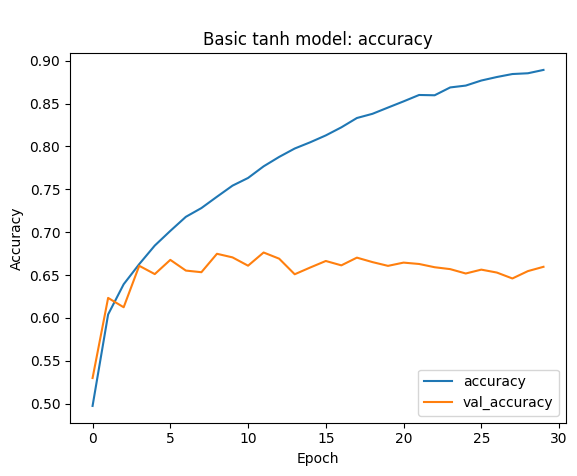

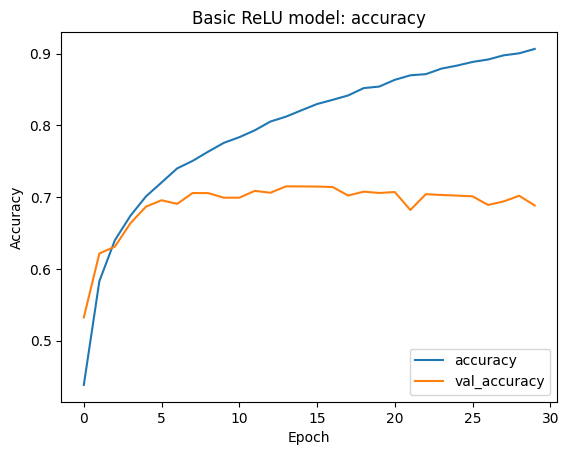

In [197]:
# basic tanh model
model_tanh = models.Sequential(
    [
        keras.Input((32, 32, 3)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('tanh'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('tanh'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('tanh'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('tanh'),
        layers.Dense(10)
    ]
)

model_tanh.summary()

model_tanh.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_tanh = model_tanh.fit(train_images, train_labels, epochs=30,
                              validation_data=(test_images, test_labels))

# testing the tanh model and comparing to previous
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with basic tanh model: ", test_acc_tanh)
print("Test accuracy with basic ReLU model: ", test_acc)

# plotting the results
plt.plot(history_tanh.history['accuracy'], label='accuracy')
plt.plot(history_tanh.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('\nBasic tanh model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

## Task 3
The increase in channels is partly to compensate for the reduction in pixel dimensions that occurs naturally as a result of the convolutions and (chosen pooling method). As we remove pixels, we want to store more information on the ones that remain. One example of channel usage would be to store the different rotations of the image that remains after the convolution. Furthermore, we choose #channels to be 32 and 64 as these are powers of 2, and the language of the computer is binary - therefor easing the computations.

## Task 4


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_60 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_61 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_62 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_63 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,466 (482.29 KB)

 Trainable params: 123,018 (480.54 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.4566 - loss: 1.5176 - val_accuracy: 0.5101 - val_loss: 1.4812
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6528 - loss: 0.9976 - val_accuracy: 0.3237 - val_loss: 2.7691
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7101 - loss: 0.8379 - val_accuracy: 0.6803 - val_loss: 0.9075
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7372 - loss: 0.7561 - val_accuracy: 0.6114 - val_loss: 1.1781
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7598 - loss: 0.6921 - val_accuracy: 0.7047 - val_loss: 0.8799
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7831 - loss: 0.6248 - val_accuracy: 0.6698 - val_loss: 1.0140
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8003 - loss: 0.5814 - val_accuracy: 0.7533 - val_loss: 0.7409
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8149 - loss: 0

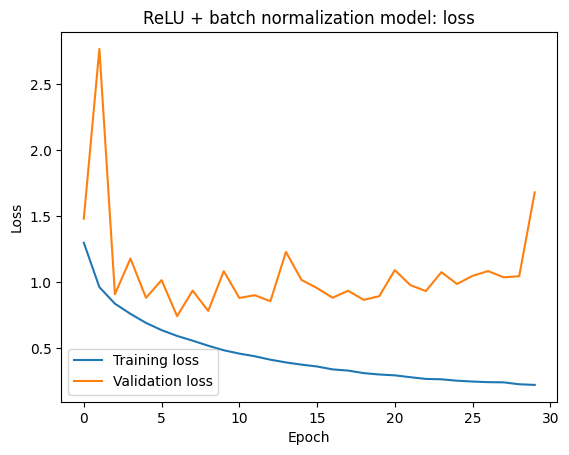

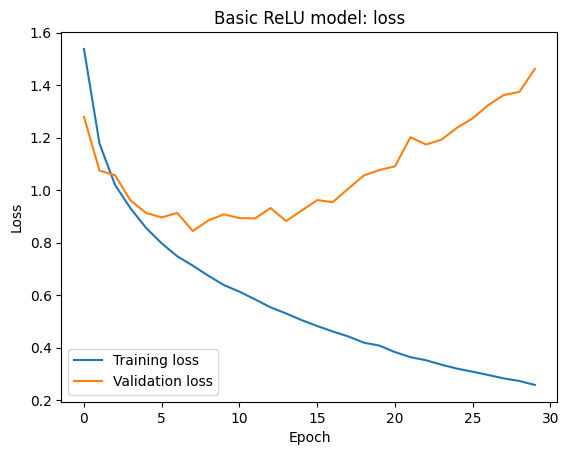

In [198]:
# batch normalization model
model_bn = models.Sequential(
    [
        tf.keras.Input((32, 32, 3)),
        
        layers.Conv2D(32, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_bn.summary()

model_bn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# default mini-batch size is 32
history_bn = model_bn.fit(train_images, train_labels, epochs=30,
                          validation_data=(test_images, test_labels), batch_size=16)

# testing the model
test_loss_bn, test_acc_bn = model_bn.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + batch normalization model: ", test_acc_bn)
print("Test accuracy with basic ReLU model: ", test_acc)

# plotting the results of the batch normalization model
plt.plot(history_bn.history['loss'], label='Training loss')
plt.plot(history_bn.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + batch normalization model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

## Task 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0118252].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0280606].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0039074].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.021497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0194992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.022129].


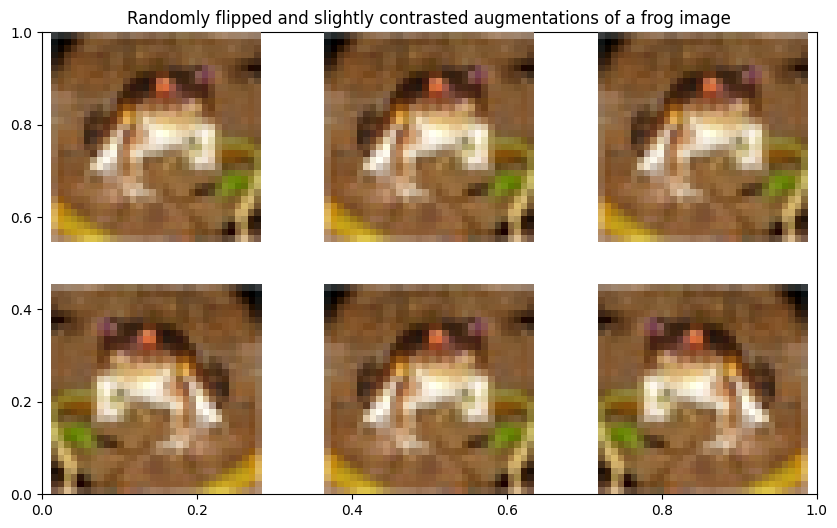

In [199]:
# temp data augmentation sequence for visualization
temp_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomContrast(0.1)
    ]
)

# data augmentation of frog image visualized
frog = train_images[0]
plt.figure(figsize=(10, 6))
plt.title('Randomly flipped and slightly contrasted augmentations of a frog image')
for i in range(6):
  augmented_image = temp_augmentation(frog)
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3521 - loss: 1.7382 - val_accuracy: 0.5153 - val_loss: 1.4056
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5680 - loss: 1.2108 - val_accuracy: 0.6143 - val_loss: 1.1148
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6369 - loss: 1.0340 - val_accuracy: 0.6556 - val_loss: 0.9798
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6743 - loss: 0.9332 - val_accuracy: 0.6565 - val_loss: 0.9643
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6989 - loss: 0.8535 - val_accuracy: 0.6974 - val_loss: 0.8800
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7175 - loss: 0.8106 - val_accuracy: 0.6842 - val_loss: 0.9332
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7345 - loss: 0.7583 - val_accuracy: 0.7173 - val_loss: 0.8190
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7477 - loss: 0.7246 - 

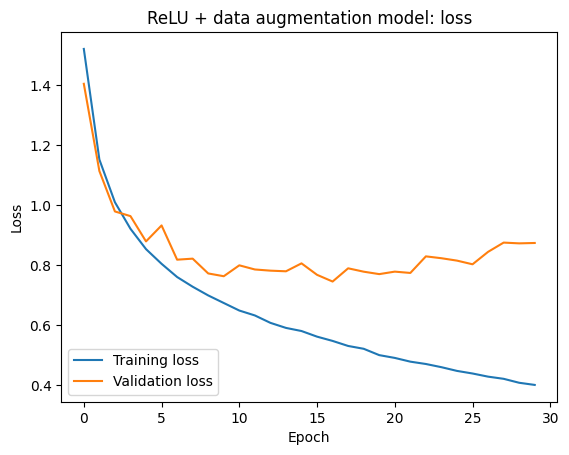

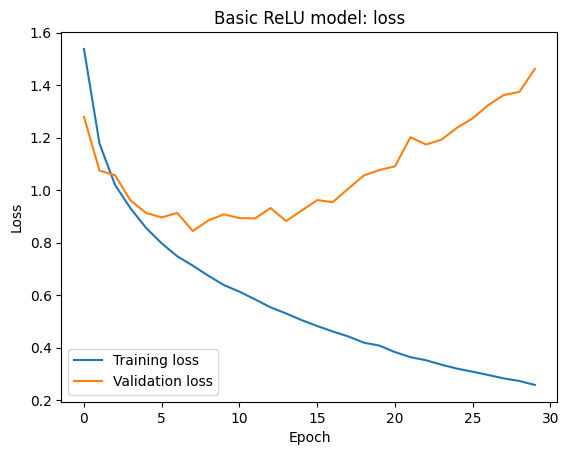

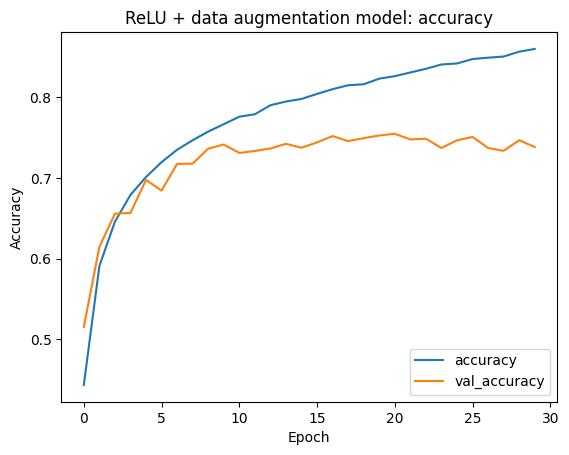

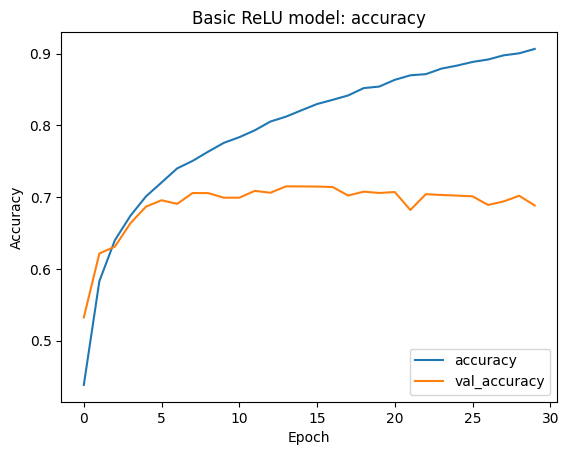

In [200]:
# data augmentation to be implemented
data_augmentation = tf.keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomContrast(0.1)
    ]
)

# data augmentation model
model_aug = models.Sequential(
    [
        tf.keras.Input((32, 32, 3)),
        data_augmentation,

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_aug.summary()

model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training the model
history_aug = model_aug.fit(train_images, train_labels, epochs=30, 
                            validation_data=(test_images, test_labels))

# testing the data augmentation model
test_loss_aug, test_acc_aug = model_aug.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + data augmentation model: ", test_acc_aug)
print("Test accuracy with basic ReLU model: ", test_acc)

# plotting the results of the data augmentation model
plt.plot(history_aug.history['loss'], label='Training loss')
plt.plot(history_aug.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + data augmentation model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history_aug.history['accuracy'], label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("ReLU + data augmentation model: accuracy")
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()

### Why data augmentation can help reduce overfitting and improve the generalization power of the model
 - injects noise - reduces overfitting
 - extends space of interpolation - increasing the generalization of the model
 - 

## Task 6


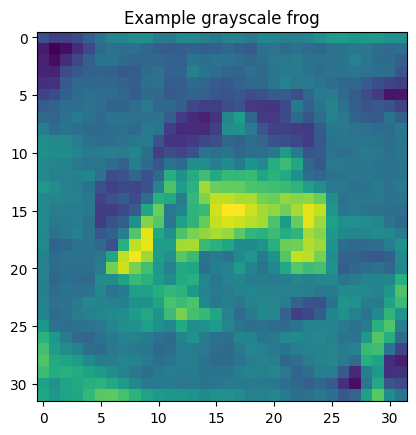

In [201]:
from skimage.color import rgb2gray
import numpy as np

# Convert train and test images to grayscale
train_images_gray = rgb2gray(train_images)
test_images_gray = rgb2gray(test_images)

# Add channel dimension for compatibility with CNNs
train_images_gray = train_images_gray [..., np.newaxis]
test_images_gray = test_images_gray [..., np.newaxis]

plt.imshow(train_images_gray[0])
plt.title("Example grayscale frog")
plt.show()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,994 (476.54 KB)

 Trainable params: 121,994 (476.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2849 - loss: 1.9247 - val_accuracy: 0.4887 - val_loss: 1.4264
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5216 - loss: 1.3619 - val_accuracy: 0.5532 - val_loss: 1.2795
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5987 - loss: 1.1627 - val_accuracy: 0.5940 - val_loss: 1.1668
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6271 - loss: 1.0682 - val_accuracy: 0.6116 - val_loss: 1.1083
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6609 - loss: 0.9786 - val_accuracy: 0.6547 - val_loss: 1.0034
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6789 - loss: 0.9283 - val_accuracy: 0.6548 - val_loss: 0.9961
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6928 - loss: 0.8765 - val_accuracy: 0.6607 - val_loss: 0.9828
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7124 - loss: 0.8238 - 

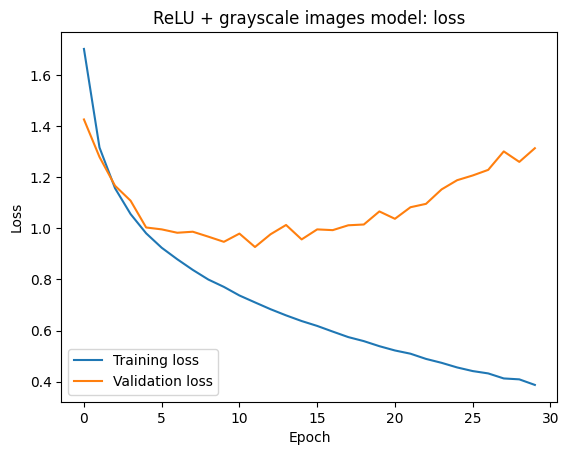

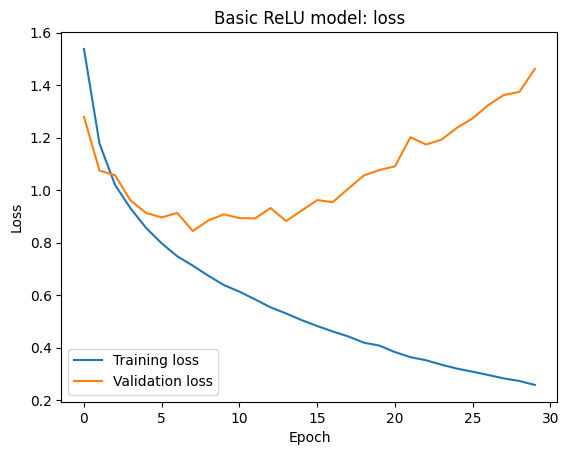

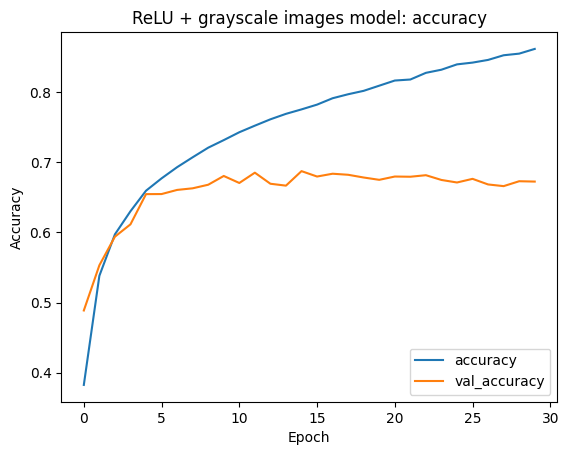

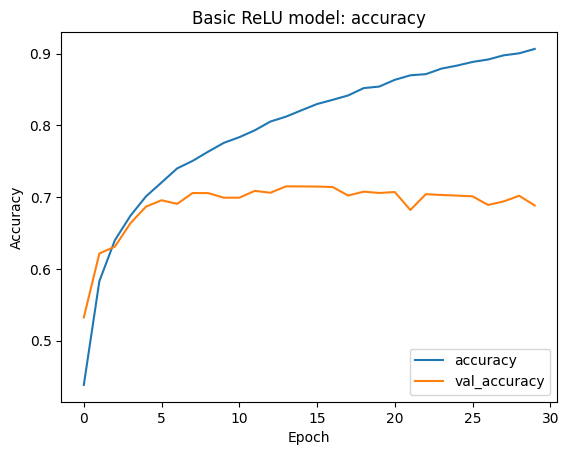

In [202]:
model_gray = models.Sequential(
    [
        # only difference from basic model is channel dimension
        tf.keras.Input((32, 32, 1)),

        layers.Conv2D(32, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3)),
        layers.Activation('relu'),

        layers.Flatten(),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10)
    ]
)

model_gray.summary()

model_gray.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# default mini-batch size is 32
history_gray = model_gray.fit(train_images_gray, train_labels, epochs=30,
                              validation_data=(test_images_gray, test_labels))

# testing the grayscale model
test_loss_gray, test_acc_gray = model_gray.evaluate(test_images_gray,  test_labels, verbose=2)
print("\nTest accuracy with ReLU + graycale images model: ", test_acc_gray)
print("Test accuracy with basic ReLU model: ", test_acc)

plt.plot(history_gray.history['loss'], label='Training loss')
plt.plot(history_gray.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ReLU + grayscale images model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic ReLU model: loss')
plt.legend(loc='lower left')
plt.show()

plt.plot(history_gray.history['accuracy'], label='accuracy')
plt.plot(history_gray.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ReLU + grayscale images model: accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic ReLU model: accuracy')
plt.legend(loc='lower right')
plt.show()